In [1]:
# Initialize Otter 
import otter
grader = otter.Notebook("group_activity6.ipynb")

# In-class coding exercise #6
Objective: In this exercise you will practice loading data from netCDF files using xarray, indexing and selecting data in DataSets, and mapping 2-D data using Cartopy.
## Introduction to group coding exercises
Today you’ll work on this exercise in the same groups of 3-4 you were assigned last week, submitting a single notebook file at the end of the class period. Decide amongst yourselves which member will upload the completed notebook to Gradescope this week. Make sure that everyone takes a turn being the “Uploader”. _You cannot upload the final code two weeks in a row._

Designate a different group member to be the "Reporter". The Reporter will be in charge of participating in the group discussion at the end of the class session.

### Workflow
Each question will be timed to ensure that everyone gets to work on at least a part of every question. Group activities are not graded by completeness or correctness, but by effort. We will be breaking down each question in the following order:  
1. Independent work 
2. Group work and discussion on coding question
3. Group work and discussion on reflection questions

You are welcome and encouraged to communicate with other groups and the teaching team when you feel stuck on a problem. 

As a reminder, we will be grading based best practices in coding. These include: 
1) Variables are used to store objects

2) Code is commented adequately

3) Variables are names appropriately

4) Code is efficient with minimal unnecessary lines 

5) Documenting help from outside sources, such as from other groups or online documentation. 

6) Final notebook fully runs from start to finish. A good way to check this is restarting the kernel and fully running through all the cells to check for any errors.

### Storing your answers
In the code cells where you will write your answers, there will be comments denoting:

"**# your code**"

and 

"**# answer variables**"

You may store any intermediary variables in the **your code** section. If you do not have any intermediary, you can also store your answer directly in the answer variables.

### Required Plot Elements for Figures
This assignments requires you to create and design figures using `matplotlib`. To practice good plotting practices, each figure will require the following to receive full points:
1) Concise, descriptive title for each figure/subplot
2) Axis labels with units (when possible)
3) Appropriate axis limits (minimum and maximum)
4) Appropriate tick resolution
5) Legend when using different datasets 
6) Appropriate font size (a good range is 12-15)

## Note here **and in the Gradescope submission** each of your group members:
1. Alex
2. Rachael
3. Yiyang 
4. Maggie  

<!-- BEGIN QUESTION -->

# Q1: Exploring features of Cartopy (15 minutes)

Check out this [link](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) to find the cartopy mapping projections and answer the following questions in the text box below.

> 1) How many projections are available in cartopy?

> 2) What is the projection with a non-zero central_longitude default value?

> 3) Which two projections have the poles in the center of the map?

> 4) Which of these projections have you seen? Where? What purpose were they serving? 

1. There are 25 different projections. 
2. Gnomonic 
3. NorthPolarStereo, SouthPolarStereo
4. InterruptedGoodeHomolosine to show the different perspective maps can give, Robinson as a general map, PlateCarree, Mercator, Mollweide 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Q2: Chlorophyll and Nitrate from Mercator-Pisces Biogeochemistry Model

We will be accessing gridded data from a European global biogeochemical model.

"Produced by Mercator Ocean in Toulouse, France, is a global Ocean Biogeochemical analysis product at 1/2°. It is providing a 7-days mean global forecast updated weekly as well as 3D global ocean biogeochemical weekly mean analysis for the past 2 years updated every week. This product includes weekly mean files of dissolved iron, **nitrate**, phosphate, silicate, dissolved oxygen, **chlorophyll concentration**, phytoplankton concentration and primary production parameters from the top to the bottom of the Global Ocean on a 1/2° regular grid projection interpolated from the 1/4° ARAKAWA-C native grid. Vertical coverage includes 50 levels ranging from 0 to 5500 meters." 

[Source](http://marine.copernicus.eu)

## Part 1 (15 minutes):

For this part, we will read in our data using the `pycmap` library and an API key.

## Instructions
_**Don't forget to print your answer variables for each part!**_
1) Using the starter code, fill in the `key` variable with your own API key from CMAP. If you haven't already generated an API key, create one [here](https://simonscmap.com/apikeymanagement). 

*This may take up to a few minutes to run since we are loading large files. Make sure to keep your code to Part 1 separated from Parts 2-4, so you are not running it over and over again.

2) Read the rest of the code and comments to understand how the data is transformed into an `xarray dataset`.

3) In a comment below the starter code, explain what we are doing to the data when we are selecting for the first index of depth in the `chl` variable. What happens to the dimensions? Next, what happens when you take the average ("mean") across time? Describe some assumptions you are making with this type of averaging. (4-5 sentences)

In [2]:
# Import packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import pycmap

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [ ]:
## STARTER CODE
# access data via cmap
#enter your personal API key from CMAP as a string below
key = 'af86ca5b-4c94-4e90-8ca6-dda99d919346'                     
#call the CMAP API using your unique key
api = pycmap.API(token=key)
# call the API to pull data into a dataframe named pisces
pisces=api.query(
         '''
         SELECT [time], lat, lon, depth, CHL, NO3 FROM tblPisces_NRT
         WHERE 
         [time] BETWEEN '2016-06-01' AND '2016-06-15' AND 
         lat BETWEEN -90 AND 90 AND 
         lon BETWEEN -180 AND 180 AND
         depth BETWEEN 0 AND 1
         '''
         ) 
# create a pandas dataframe and convert to xarray
df_rows = pd.DataFrame(pisces).set_index(["time",  "lat", "lon", "depth"])  # since this is a gridded data, it is useful to transorm from a table into an array 
ds = xr.Dataset.from_dataframe(df_rows)

# select only depth index and average across time for chl and no3
chl = ds['CHL'].isel(depth=0).mean('time')  # taking an average in time, once we have the data in xarray format
no3 = ds['NO3'].isel(depth=0).mean('time')
del pisces

#We are making the data start at the sea surface and the dimensions will be smaller than it was before . 
# When you take the average mean across time it shows what the overall avearage was. 
# by doing this you are assuming there are no data errors

In [12]:
display(chl) 
display(no3)

<xarray.DataArray 'CHL' (lat: 359, lon: 720)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.35315113, 0.3531889 , 0.35353095, ..., 0.3542422 , 0.35408271,
        0.35349864],
       [0.29117669, 0.2917387 , 0.29217678, ..., 0.28886524, 0.28972786,
        0.29050244],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * lat      (lat) float64 -89.0 -88.5 -88.0 -87.5 -87.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
    depth    float64 0.494

<xarray.DataArray 'NO3' (lat: 359, lon: 720)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [7.7285316 , 7.71875572, 7.70348382, ..., 7.73107409, 7.72787547,
        7.73115158],
       [8.28958607, 8.28746271, 8.28578901, ..., 8.29822159, 8.29501104,
        8.2921176 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * lat      (lat) float64 -89.0 -88.5 -88.0 -87.5 -87.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
    depth    float64 0.494

<!-- END QUESTION -->

## Part 2: Make a Chlorophyll map (35 minutes)

1) From your `chl` data array, assign the latitude, longitude, and chl values to the `lat`, `lon`, and `chl` variables, respectively. 

2) Using matplotlib.pyplot figure() and cartopy, make a global color map using the [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) function for chlorophyll 

*Revisit the live coding demo from 11/05 for help.* 

In addition to the required plot elements, maps should include:

>a) A Robinson projection.

>b) A color mapping that represents your data. Choose one from the [matplotlib API](https://matplotlib.org/stable/users/explain/colors/colormaps.html), such as 'Greens'

>b) Coastline in black and resolution set to '110m' and land features in 'lemonchiffon'.

>c) A colorbar with appropriate colormap limits for both maps, using the "vmin" and "vmax" arguments, and a label units.

_HINT_: Try setting the "norm" argument in `pcolormesh()` to a [LogNorm](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.LogNorm.html) object to better distinguish between the colors!

>d) Latitude and longitude gridlines.

_HINT_: To get gridlines to show, you will need to plot them **after** you plot your data with `pcolormesh()`!

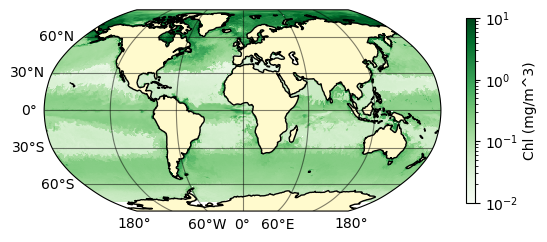

In [39]:
from matplotlib.colors import LogNorm
# your code

# answer variables
lat = chl['lat'].values  
lon = chl['lon'].values   # must specify the coordinate if pulling something more from the array 
chl_vals = chl.values    #just do .values because its pulling straight from the array 

# your code to make your map
fig = plt.figure() 
ax = plt.axes(projection = ccrs.Robinson())  #import the robinsons
plt.pcolormesh(lon, lat, chl_vals, cmap = 'Greens', norm = LogNorm(vmin = .01 , vmax = 10), 
              transform = ccrs.PlateCarree())
plt.colorbar(label = 'Chl (mg/m^3)', shrink = .5) 
g = ax.gridlines(transform = ccrs.PlateCarree(), 
            color = "black", 
            alpha = .5)
g.bottom_labels = True
g.left_labels = True  # these add the grid lines 
ax.coastlines(resolution ='110m', color = 'black')
ax.add_feature(cfeature.LAND, color = 'lemonchiffon')

In [34]:
grader.check("Question 2, Part 2")

Question 2, Part 2 results: All test cases passed!

## Part 3: Make a Nitrate map (10 minutes)

1) From your `no3` data array, assign the nitrate values to the `no3_vals` variable. 

2) Create a map for Nitrate as you have done for Chlorophyll and Part 2. You may copy/paste your code from above, but don't forget to change any labels or titles!

3) Choose a different color mapping for Nitrate than what you had for Chlorophyll, and use a range of 0.01-10 for your "vmin" and "vmax" arguments. Try using the "norm" argument with LogNorm again here.

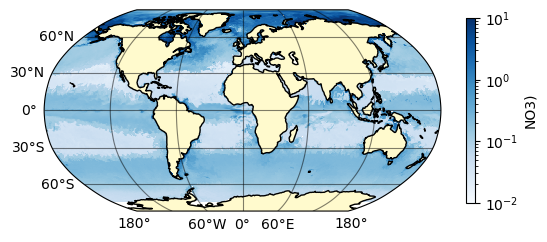

In [43]:
# your code
# for this we copy the same thing but change values, titles, and color 
# answer variables
lat = no3['lat'].values
lon = no3['lon'].values
no3_vals = no3.values 

# your code to make your map
fig = plt.figure() 
ax = plt.axes(projection = ccrs.Robinson())
plt.pcolormesh(lon, lat, chl_vals, cmap = 'Blues', norm = LogNorm(vmin = .01 , vmax = 10), 
              transform = ccrs.PlateCarree())
plt.colorbar(label = 'NO3)', shrink = .5) 
g = ax.gridlines(transform = ccrs.PlateCarree(), 
            color = "black", 
            alpha = .5)
g.bottom_labels = True
g.left_labels = True
ax.coastlines(resolution ='110m', color = 'black')
ax.add_feature(cfeature.LAND, color = 'lemonchiffon')

In [42]:
grader.check("Question 2, Part 3")

Question 2, Part 3 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Part 4: Create a contour maps with Chlorophyll and Nitrate (30 minutes)

Now, we'll focus on a specific region in North Pacific, called the Transition Zone. This area is known for its sharp change in biogeochemical properties as it borders the N. Pacific subtropical and subpolar gyres. 

### Instructions
1) Run the starter code code to query data from CMAP for the North Pacific Transition Zone. Notice how the latitude, longitude, and depth ranges have changed from Part 1. 

2) Briefly describe how the `chl_depth` and `no3_depth` variables are being averaged here. Which dimensions are we aggregating, and what kind of assumptions are being made? Write your answer in a comment below the starter code (2-3 sentences). 

3) Store the latitude and depth values in the `lat` and `depth` answer variables.

4) Create a contour plot using `matplotlib contourf()` for Chlorphyll. Your x-axis should reprersent latitude, and your y-axis depth. You will need to tranpose your `chl_depth` variable (see demo from Week 6 on how to do this) to create your plot. Add the following to your plot:
    - Appropriate number of levels
    - A meaningful color map
    - Color bar with appropriate limits and label with units
    - Inverted y-axis (0 should be at the top)
    - Axis labels and Title

5) Add conntour lines using `matplotlib contour()` for **Nitrate**. Your plot should include:
    - Contour lines with color black
    - Appropriate number of levels between contour lines
    - Contour line labels (`clabel()` function) with appropriate number of levels between text
    
6) Describe how chlorophyll and nitrate are changing with respect to latitude and depth. Why do you think this is? How do you think nitrate and chlorophyll are affected by each other? Write your answer in a comment below your code (3-4 sentences).

In [44]:
## starter code
# query to make depth profile
pisces_tz=api.query(
         '''
         SELECT [time], lat, lon, depth, CHL, NO3 FROM tblPisces_NRT
         WHERE 
         [time] BETWEEN '2016-06-01' AND '2016-06-15' AND 
         lat BETWEEN 15 AND 50 AND 
         lon BETWEEN -150 AND -130 AND
         depth BETWEEN 0 AND 400
         '''
         ) 
df_rows_tz = pd.DataFrame(pisces_tz).set_index(["time",  "lat", "lon", "depth"])  # since this is a gridded data, it is useful to transorm from a table into an array 
ds_tz = xr.Dataset.from_dataframe(df_rows_tz)
# take means along time and longitude to create depth profiles along latitude
chl_depth = ds_tz['CHL'].mean(['time', 'lon'])
no3_depth = ds_tz['NO3'].mean(['time', 'lon'])

In [47]:
display(chl_depth) 
display(no3_depth) 

<xarray.DataArray 'CHL' (lat: 71, depth: 30)>
array([[0.12752286, 0.1275679 , 0.12773356, ..., 0.02541874, 0.01539654,
        0.00954518],
       [0.11502088, 0.11508838, 0.11522606, ..., 0.02666376, 0.01571092,
        0.00962453],
       [0.10591705, 0.10595671, 0.10608768, ..., 0.0266742 , 0.01520861,
        0.00924229],
       ...,
       [0.12751437, 0.12755631, 0.12765792, ..., 0.00997064, 0.00671484,
        0.00546721],
       [0.13338972, 0.13342416, 0.1335186 , ..., 0.0105616 , 0.00734859,
        0.00601435],
       [0.13438497, 0.13443378, 0.13455441, ..., 0.01072133, 0.00745632,
        0.00608125]])
Coordinates:
  * lat      (lat) float64 15.0 15.5 16.0 16.5 17.0 ... 48.0 48.5 49.0 49.5 50.0
  * depth    (depth) float64 0.494 1.541 2.646 3.819 ... 222.5 266.0 318.1 380.2

<xarray.DataArray 'NO3' (lat: 71, depth: 30)>
array([[ 3.62113443,  3.62110737,  3.62092466, ..., 25.98790045,
        29.04778927, 31.88846702],
       [ 2.91512433,  2.91502697,  2.9149167 , ..., 25.4352852 ,
        28.6688348 , 31.57626638],
       [ 2.15619618,  2.15610453,  2.15593161, ..., 25.06361378,
        28.56951204, 31.58511029],
       ...,
       [ 9.01041564,  9.01031982,  9.01070164, ..., 27.41102079,
        29.85589193, 32.55228757],
       [ 8.94244036,  8.94257093,  8.94262537, ..., 27.77119613,
        29.97774464, 32.40947063],
       [ 9.00178533,  9.00173971,  9.0016567 , ..., 28.0766178 ,
        30.28800504, 32.66211058]])
Coordinates:
  * lat      (lat) float64 15.0 15.5 16.0 16.5 17.0 ... 48.0 48.5 49.0 49.5 50.0
  * depth    (depth) float64 0.494 1.541 2.646 3.819 ... 222.5 266.0 318.1 380.2

In [53]:
# answer variables
lat = chl_depth['lat'].values
depth = chl_depth['depth'].values

# your code to plot


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Reflection questions (5 minutes)
The purpose of the reflection is to inform us as instructors about students comfort level with course content. We use these answers to inform how we spend class time and design coursework in subsequent weeks. This question is graded for completeness, so please answer each question in the text box below. Be concise in your answers (max. 2 sentences). 

1) What do you feel you excelled at in this exercise? Why?

2) What did you struggle with most in the exercise? Why?

3) Is there any section of the question that you did not complete? If so, briefly describe why and the section you spent the most time on. 

4) Is there any topic you feel we need to revisit or review in class? Why?

1. We all understood how to plot on the graph and our labelling because we have done a lot of that practice in class. 
2. We struggled the most with the more specific commands that we did not have as much practice with such as the vmin and vmax. 
3. We did not finish part four becasue we spent the most time figuring out how to make the first part of the graph and getting everyone in thr goup to complete it. 
4. It would be good to just go over the general formats of matplot. We felt as though it was sometimes hard to just see the type of graph it wanted and know what it outputted. 

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [54]:
grader.check_all()

Question 2, Part 2 results:
    Question 2, Part 2 - 1 message: Check lat variable!

    Question 2, Part 2 - 1 result:
        ❌ Test case failed
        Trying:
            len(lat) == 359
        Expecting:
            True
        **********************************************************************
        Line 2, in Question 2, Part 2 0
        Failed example:
            len(lat) == 359
        Expected:
            True
        Got:
            False

    Question 2, Part 2 - 2 result:
        ✅ Test case passed

    Question 2, Part 2 - 3 result:
        ✅ Test case passed

Question 2, Part 3 results: All test cases passed!